In [34]:
!pipenv install statsmodels

Installing statsmodels...
Resolving statsmodels...
[    ] Installing...
Added statsmodels to Pipfile's [packages] ...
[    ] Installing statsmodels...
Installation Succeeded
[    ] Installing statsmodels...
[    ] Installing statsmodels...

Building requirements...
[    ] Locking...
Resolving dependencies...
[    ] Locking...
[=   ] Locking...
[==  ] Locking...
[=== ] Locking...
[ ===] Locking...
[  ==] Locking...
[    ] Locking...
[   =] Locking...
[  ==] Locking...
[ ===] Locking...
[====] Locking...
[=== ] Locking...
[=   ] Locking...
[    ] Locking...
[=   ] Locking...
[==  ] Locking...
[=== ] Locking...
[ ===] Locking...
[   =] Locking...
[    ] Locking...
[   =] Locking...
[  ==] Locking...
[ ===] Locking...
[====] Locking...
[==  ] Locking...
[=   ] Locking...
[    ] Locking...
[=   ] Locking...
[==  ] Locking...
[=== ] Locking...
[  ==] Locking...
[   =] Locking...
[    ] Locking...
[   =] Locking...
[  ==] Locking...
[====] Locking...
[=== ] Locking...
[==  ] Locking...
[=   ]

Pipfile.lock (d38613) out of date, updating to (4a1a76)...
Locking [packages] dependencies...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (f66d6c146689b5c34bd8cac6ba00da89cb8d0ea7bea8a9166b9d02082b4a1a76)!


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [3]:
df.columns = ["Month","Sales"]

In [4]:
df.drop([105,106], axis=0, inplace=True)

In [5]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [6]:
df['Month'] = pd.to_datetime(df['Month'])

In [7]:
df.set_index('Month',inplace=True)

In [8]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [9]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualize the Data

<Axes: xlabel='Month'>

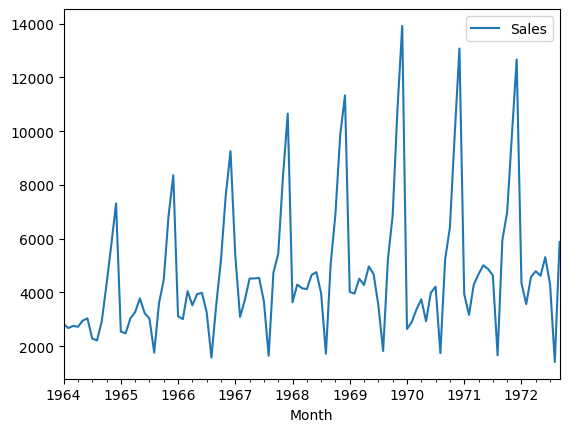

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()

### Testing for Stationarity

In [11]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Sales'])

In [12]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [13]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276175
p-value : 0.3639157716602477
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [14]:
# df['Sales']
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [15]:
pd.set_option('display.max_columns', 10000)

In [16]:
print(df['Sales'].shift(12).to_string())

Month
1964-01-01        NaN
1964-02-01        NaN
1964-03-01        NaN
1964-04-01        NaN
1964-05-01        NaN
1964-06-01        NaN
1964-07-01        NaN
1964-08-01        NaN
1964-09-01        NaN
1964-10-01        NaN
1964-11-01        NaN
1964-12-01        NaN
1965-01-01     2815.0
1965-02-01     2672.0
1965-03-01     2755.0
1965-04-01     2721.0
1965-05-01     2946.0
1965-06-01     3036.0
1965-07-01     2282.0
1965-08-01     2212.0
1965-09-01     2922.0
1965-10-01     4301.0
1965-11-01     5764.0
1965-12-01     7312.0
1966-01-01     2541.0
1966-02-01     2475.0
1966-03-01     3031.0
1966-04-01     3266.0
1966-05-01     3776.0
1966-06-01     3230.0
1966-07-01     3028.0
1966-08-01     1759.0
1966-09-01     3595.0
1966-10-01     4474.0
1966-11-01     6838.0
1966-12-01     8357.0
1967-01-01     3113.0
1967-02-01     3006.0
1967-03-01     4047.0
1967-04-01     3523.0
1967-05-01     3937.0
1967-06-01     3986.0
1967-07-01     3260.0
1967-08-01     1573.0
1967-09-01     3528.0
1967

In [17]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [18]:
## Again Test Dickey Fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213164
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Month'>

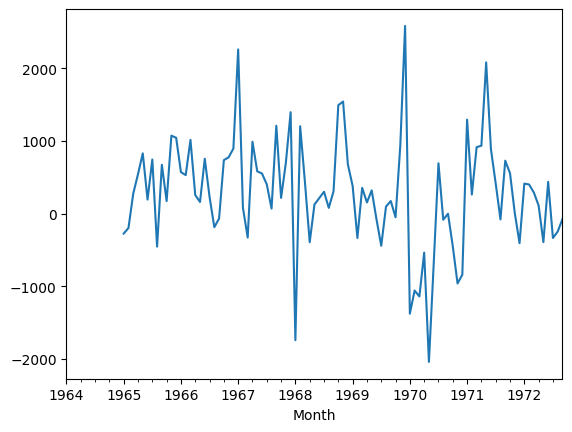

In [19]:
df['Seasonal First Difference'].plot()

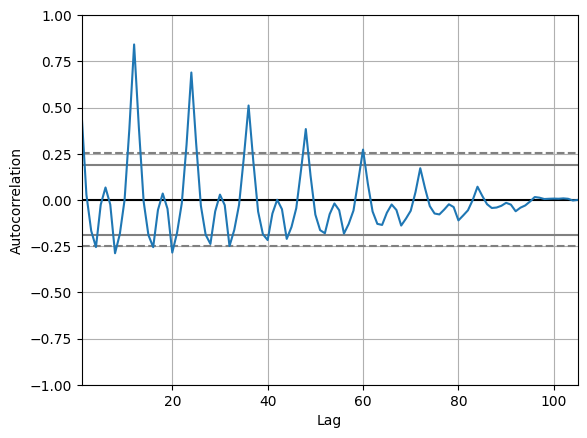

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

# Final Thoughts

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

NameError: name 'sm' is not defined

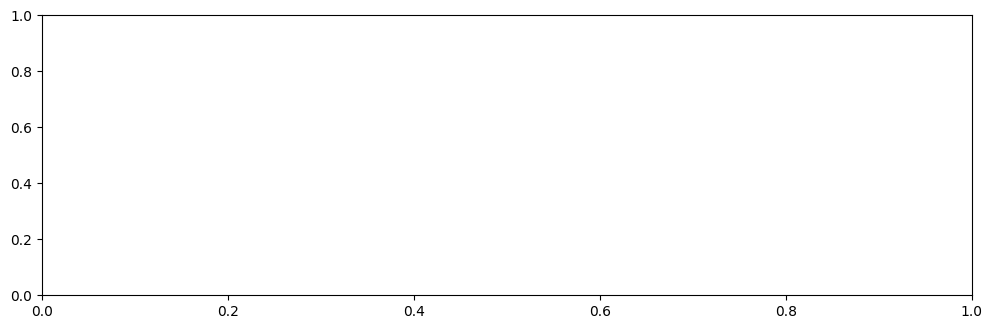

In [28]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)